In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# DATA PREPROCESSING

## Checking for missing values

In [3]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

## Checking for duplicate Values

In [38]:
df.duplicated().sum()

0

    #### NO duplicate values as well

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


## Check for Unique values in every columns

In [6]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
print("Categories in Location variable",end="")
print(df['Location'].unique())

Categories in Location variable['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


## Checking for numerical as well as categorical features

In [9]:
numeric=[feature for feature in df.columns if df[feature].dtype!='O']
categorical=[feature for feature in df.columns if df[feature].dtype=='O']

print("We have{} numerical feature:{}".format(len(numeric),numeric))
print("We have{} categorical feature:{}".format(len(categorical),categorical))

We have6 numerical feature:['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
We have3 categorical feature:['Name', 'Gender', 'Location']


# FEATURE ENGINEERING AND DATA VISUALIZATION 

C:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


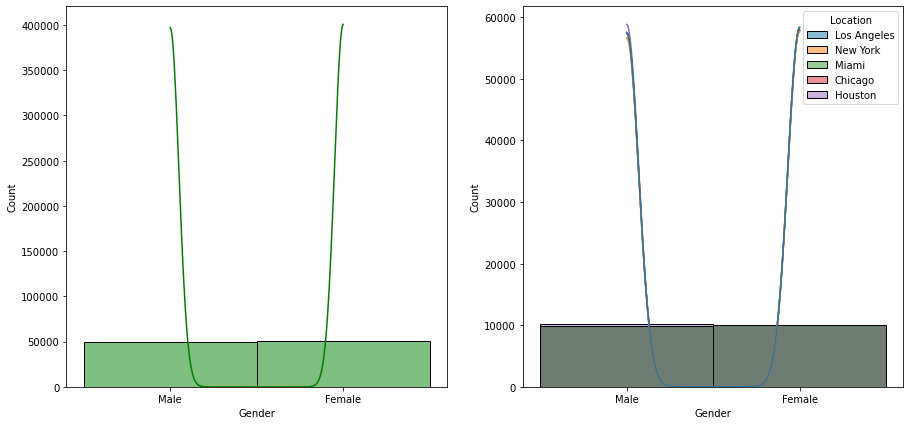

In [10]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Gender',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Gender',kde=True,hue='Location')
plt.show()

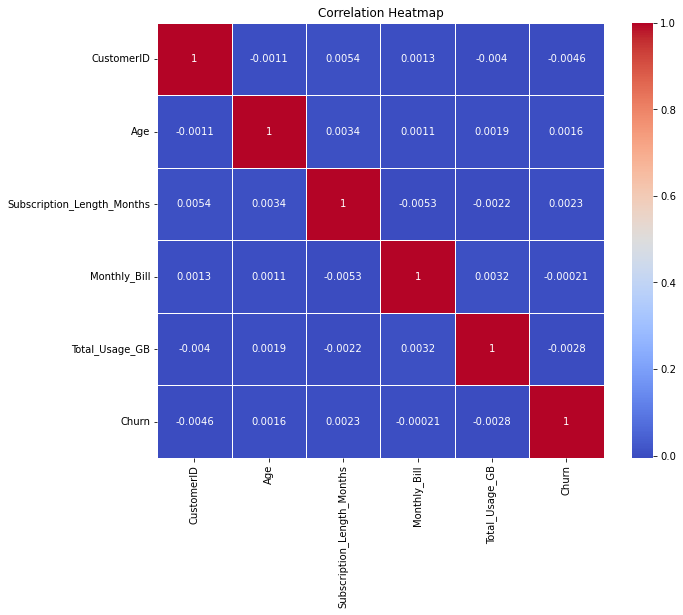

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



#### The heatmap clearly states that the Churn has good corelation which evry features except the customer id and Total_Usage_GB

# Checkiing the Outlier

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

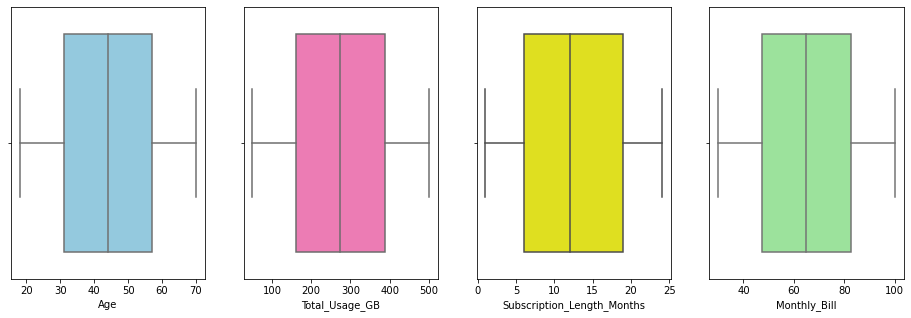

In [12]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Total_Usage_GB'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Subscription_Length_Months'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Monthly_Bill'],color='lightgreen')
plt.show()

## Converting the Categorical Value to Numerical using Ordinal Encoder

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Assuming 'Gender' is the column name in your DataFrame 'df'
df['gender_encoded'] = encoder.fit_transform(df[['Gender']])

# Display the DataFrame with encoded values
print(df)


       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                              17         73.36             236      0   
1                               1         48.76             172      0   
2        

In [14]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,gender_encoded
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1.0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,0.0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0.0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0.0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0.0


In [15]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
df['Location_encoded'] = encoder.fit_transform(df[['Location']])
print(df)


       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                              17         73.36             236      0   
1                               1         48.76             172      0   
2        

In [16]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,gender_encoded,Location_encoded
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1.0,2.0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,0.0,4.0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0.0,2.0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0.0,3.0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0.0,3.0


### For male: Value is 1 and For Female it is 0

### For Location: Los Angeles=2, New York:4, Miami:3,Houston:1, Chicago:0

In [17]:
finaldf = df.drop(['Gender', 'Location'], axis=1)
finaldf.head()


,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,gender_encoded,Location_encoded
0,1,Customer_1,63,17,73.36,236,0,1.0,2.0
1,2,Customer_2,62,1,48.76,172,0,0.0,4.0
2,3,Customer_3,24,5,85.47,460,0,0.0,2.0
3,4,Customer_4,36,3,97.94,297,1,0.0,3.0
4,5,Customer_5,46,19,58.14,266,0,0.0,3.0


In [18]:
x=finaldf.drop(['CustomerID', 'Name','Total_Usage_GB','Churn'], axis=1)
x

,Age,Subscription_Length_Months,Monthly_Bill,gender_encoded,Location_encoded
0,63,17,73.36,1.0,2.0
1,62,1,48.76,0.0,4.0
2,24,5,85.47,0.0,2.0
3,36,3,97.94,0.0,3.0
4,46,19,58.14,0.0,3.0
...,...,...,...,...,...
99995,33,23,55.13,1.0,1.0
99996,62,19,61.65,0.0,4.0
99997,64,17,96.11,1.0,0.0
99998,51,20,49.25,0.0,4.0


In [19]:
y=finaldf.iloc[:,6]
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

# Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# MODEL BUILDING

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings

In [24]:
def evaluate_model(true,predicted):
    accuracy=accuracy_score(true,predicted)
    recall=recall_score(true,predicted)
    precision=precision_score(true,predicted)
    return accuracy,recall,precision

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XtraGradientBoosting": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []



for i in range(len(list(models))):


    model = list(models.values())[i]
    model.fit(xtrain, ytrain)


    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    

    model_train_accuracy, model_train_recall, model_train_precision = evaluate_model(ytrain, y_train_pred)
    model_test_accuracy, model_test_recall, model_test_precision = evaluate_model(ytest, y_test_pred)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Precison : {:.4f}".format(model_train_precision))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Precsion: {:.4f}".format(model_test_precision))
    accuracy_list.append(model_test_accuracy)
    

    
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.5039
- Recall: 0.3762
- Precison : 0.5030
----------------------------------
Model performance for Test set
- Accuracy: 0.5027
- Recall: 0.3758
- Precsion: 0.4979


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.6846
- Recall: 0.6821
- Precison : 0.6841
----------------------------------
Model performance for Test set
- Accuracy: 0.4979
- Recall: 0.4893
- Precsion: 0.4936


Decision Tree
Model performance for Training set
- Accuracy: 0.9998
- Recall: 0.9995
- Precison : 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.4985
- Recall: 0.4984
- Precsion: 0.4943


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9998
- Recall: 0.9998
- Precison : 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.4990
- Recall: 0.4908
- Precsion: 0.4948


XtraGradientBoosting
Model performance for Training set
- Accu

## HyperParameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(xtest, ytest)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {test_accuracy}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.5003


## Cross Validation

In [27]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

num_folds = 5


kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    model = RandomForestClassifier(max_depth =10, min_samples_split =2, n_estimators=10)
    model.fit(xtrain, ytrain)

    y_pred = model.predict(xtest)

    accuracy = accuracy_score(ytest, y_pred)
    
    scores.append(accuracy)
average_score = np.mean(scores)
print(f'Average Accuracy: {average_score}')

Average Accuracy: 0.50061


# So Random Forest Classifier can be used to predict the CHURN output

In [28]:
xtrain.shape

(80000, 5)

# DEEP LEARNING

# Artificial Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [30]:
classifier=Sequential()
#Adding input layer
#11 units from th eshape of the layers of  the columns from the train shape
#Activation fn is ReLU will b eapplied for the Input layer

classifier.add(Dense(units=6,activation='relu'))

classifier.add(Dense(units=4,activation='relu'))

classifier.add(Dense(units=3,activation='relu'))

classifier.add(Dense(1,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model_h  =classifier.fit(xtrain,ytrain,validation_split=0.33,batch_size=10,epochs=45)

Epoch 1/45
5360/5360 [==============================] - 12s 2ms/step - loss: 0.6939 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5045
Epoch 2/45
5360/5360 [==============================] - 10s 2ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6937 - val_accuracy: 0.5045
Epoch 3/45
5360/5360 [==============================] - 10s 2ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5045
Epoch 4/45
5360/5360 [==============================] - 13s 2ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.5045
Epoch 5/45
5360/5360 [==============================] - 10s 2ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 6/45
5360/5360 [==============================] - 9s 2ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 7/45
5360/5360 [==============================] - 10s 2ms/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6933 - val_acc

In [32]:
model_h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
y_pred=classifier.predict(xtest)
y_pred=(y_pred>=0.5)

625/625 [==============================] - 1s 924us/step


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print(cm)

[[2066 7858]
 [2016 8060]]


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
score=accuracy_score(y_pred,ytest)

In [37]:
score

0.5063

# Conclusion: Both Random Forest Classifier as well as ANN can be used to predict the CHURN output.